# Protecting Location Privacy with Dynamic MAC Address Exchanging in Wireless Networks

- Authors : Ming Lei, Xiaoyan Hong, Susan V. Vrbsky

 - Reader : Djibrilla Amadou Kountché

## Abstract

 - Dynamical MAC Assignment with Shuffle (DMAS) to allow the MAC address holder to change its addresses with others

 - To protect the location privacy of the users in WLAN

### Keywords
Location privacy

## The problem studied

- The availability of location information poses the following threats:
  - Correlation of users identity, vehicle movements with GPS positions to infer patterns (visit to a doctor, etc)  
  - Lower the security of the mobile device (location may be used by attackers)
  - Physical danger for the holder of the identity

- Indivival location information can be easily collected due to:
   - the use of devices that allow location tracking of the user
   - wireless communication mechanisms:
      - Registrations of cell phones at cells
      - Registrations of 802.11 devices to Access Points (AP)
      - Communications among Vehicles and Road Side units
   - etc.


- Requirement of the law: 
   - [Location Privacy Protection Act of 2001](http://www.techlawjournal.com/cong107/privacy/location/s1164is.asp)  


### Adversary model

Because frames are broadcasted in clear an adversary can:

- eavesdrop frames and can extract MAC addresses 
- monitor targeted areas 
- record the overheard frame headers with location and time stamps
- track the node movement by analyzing the location-time series collected

## The solution proposed

- A method to lower the risks of location disclosure which:
   
   - combine the merits of two well known approaches (Periodic changes, Mix zones) to remove the shortcomings of these methods:
   
       - MAC address duplication
       - Connection disruption
       - AP access control conflict

- The method is summarized as:
  - Dynamically assigning MAC address to the hosts as in DHCP
  - MAC address shuffle among the clients of a WLAN without exposing their exchange relation and frequently disrupting their current connection


- Key ideas: 
   - a node acquires and changes its MAC address dynamically in the service area of an Access Point
   - the address pool for the acquisition and exchange consists of initial publicly known MAC addresses and all the addresses that have participated in the service within a time period
   - a node is initialized with a dynamically assigned MAC address the first time it enters the specified WLAN
   - then  a shuffle scheme will periodically mutually exchange the MAC address among the nodes
   - this will prevent the shortcomings listed before 
   - the system also shield the shuffle from IAAP ?
   - silent periods can be used 

### Architecture

- Modification of the authentication in WLAN (Access Point and Authentication Server) to add a Dynamic MAC Assignment Server (DMAS)
- Each Access Point is associated with a DMAS (is a logical entity)
- DMAS can be implemented in an entity where the security is guaranteed

The architecture is illustrated on the Figure:

![DMAS Architecture](dmas_architecture.png)

#### Association procedure

A station :

- will use a Special MAC Address (SMA) in the beacon frames as source address instead of its true MAC address
- shares a secret key and a Temporary client ID (TCID) with the Authentication Server

The authentication process :

1. A station $S$ sends associaition requests to AP with ${HNID, Encrypt(TCID, Password, R_s)}$
2. AS uses $(TCID, Password)$ to verify if the $TCID$ is a valid station. The AS sends a MAC Address Request to it's DMAS
3. The DMAS will return a free MAC address accocited whith a newly Generated $(USN,EK)$ pair
4. The AS will then responds with ${Encrypt(Rc, TCID_{new}, Ra, MAC_{new}, USN, EK), R_a}$ to $S$.
5. S checks the response and store the new TCID, (USN, EK) pair and respond to AS a message with RA
6. AS checks the client's response and instructs the AP to block or permit access.
7. After a variant silent period, $S$ changes its MAC address to the new MAC.

#### MAC shuffle 
- is a protocol to mutually change the MAC address among the current active stations

- MAC address changing candidates will form a random circle $(C_1 \rightarrow C_2 \rightarrow \cdots C_n\rightarrow C_1)$
- Then the MAC are changed according to $(C_1 \leftarrow C_2 \leftarrow \cdots C_n\leftarrow C_1)$ and so on

- A station will only know it's next MAC address, but will not be able to determine who will use its original MAC 

The shuffle procedure:

1. A station broadcasts a Shuffle Request Message with a cutoff time specification
2. Receiving nodes will decide whether to participate to the shuffle or not. Decision factors can be:

    - ongoing connections
    - time of the last shuffle
    - more criterias can be define
    
3. If a node joins the shuffle, it sends a Participation Shuffle Message (PSM) to the initiator with its own USN and encrypts its current MAC address by its Encryption Key (generated during the first DMAS server contact). This message is broadcasted using a faked source MAC address.

4. The initiator collects the USNs and their corresponding encrypted MAC address until the cutoff time. Then, sends a SCD (Shuffled Collection Done) message containing this collection to the DMAS

5. Upon receiving the SCD message, the DMAS:

   - decrypts all the encrypted MAC addresses using the shared EKs with the stations. The USN is the index to locate the keys at DMAS (have a database holding all the information needed by the process)
  - permutates all the USNs that participate to the shuffle
  - generates update notifications for all the the participating nodes based on the permuation result

6. DMAS broadcasts a Shuffle Instruction Message (SIS) composed of a set of exchanged pairs $(USN,Encrypt(MAC_{tochange}))$. 
The USN in the exchange pair is still in plaintext and EK encrypts the MAC address to the node specified by the USN. 
Once the node receives the the broadcast, it will get the correct pair, decrypt the second element in the pair and changes its current MAC adddress after a variable silent period. Only the holder of the key can decrypt the message. 
An adversary cannot link the old Mac adddress with the new one, even if the adversary particiapte to the shuffle.

An example is given by figure below.

![DMAS Shuffle](dmas_shuffle.png)

#### Problems identified
- Address duplication:  when a node answer to the PSM, but did not change its MAC address (due to missing DMAS message or other attacks) 
   - To avoid this the node requests a new address from the DMAS

## Experimentation

- type : simualtion

Given :
- $\alpha$: the probability that a node will not join the shuffle
- the scheme is resitant to the long distance tracing accross APs
- when the AP zone is empty, the server will pick up an address from the backup pool

### The probability that $n$ nodes are present in the AP
- Modelisation of the system as a Poisson arrival process with:
    - $\lambda$ as parameter
    - a node will stay in the system (AP) for an average $\frac{1}{\mu}$ assuming exponential distribution
    - The single AP zone is $m/m/\infty$ system
    - the mean number of stations in the system is $E(n) = \frac{\lambda}{\mu}$
    - The probaility that there is $n$ node in the system is :
     $P(n) = (\frac{\lambda}{\mu})^n\times \frac{\exp(\frac{-\lambda}{\mu})}{n!}$

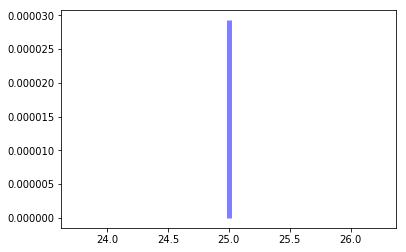

In [11]:
# the poisson probability distribution
import matplotlib.pyplot as plt
from scipy.stats import poisson

def plot(n,exp):
    fig, ax = plt.subplots(1, 1)
    ax.plot(n, poisson.pmf(n, exp), label='poisson pmf')
    ax.vlines(n, 0, poisson.pmf(n, exp), colors='b', lw=5, alpha=0.5)
    plt.show()
    

# These are the default values given in the paper
#n = 100
d_lambda = l = 1./30
d_mu = mu = 1./300
d_alpha = a = 0.5
exp = l/mu

# Plot the PMF of the distribution
plot(25, exp)


### The probability of $k$-anonimity in each shuffle

- The number of nodes participating to the shuffle is the anonimity set
- Examine the probability of $k$-anonimity in each shuffle round
- Given:
   - $m$ the number of nodes participating to the shuffle among the $n$
   - $p_{ka}$ the probability to achieve $k$-anonymity
   
   $\begin{eqnarray}
   P(m \ge k) &=&1 - P(m < k) \\ 
              &=& 1 - P((1 - \alpha)n < k) \\
              &=& 1 - \sum_{i=0}^{\frac{k}{1-\alpha} -1} P(i) \\
              &=& 1 - \sum_{i=0}^{\frac{k}{1-\alpha} -1} (\frac{\lambda}{\mu})^i\times \frac{\exp(\frac{-\lambda}{\mu})}{i!}
   \end{eqnarray}$

In [12]:
# The values of $k$
ks = range(0,30, 5)

kp = []


def kanonproba(k, exp,a):
    """Determine the k-anonimyty probability"""
    kp = 0
    
    for i in range(0, abs(int(k/(1 - a)) -1)):
        kp  = kp + poisson.pmf(i, exp)
    return max(0, 1 - kp)


def calculateExp(value, t):
    
    if(t==1):
        mu = value
        l = d_lambda
        a = d_alpha
        
    elif(t==2):
        mu = d_mu
        l= value
        a = d_alpha
    else:
        mu = d_mu
        l =d_lambda
        a = value
   
    return l/mu,a
       
        
def experimentKanon(values, text, t):
  """Experiment different cases of impact of the k-anonimity"""
  fig, ax = plt.subplots(1, 1)
  for value in values:
      exp,a = calculateExp(value,t)
      kp=[]
    
      for k in ks: 
        kp.append(kanonproba(k,exp,a))
  
      ax.plot(ks, kp, label=text+'='+"{:.3f}".format(value))

  legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
  legend.get_frame().set_facecolor('#00FFCC')

  plt.show()

#### Impact of $\mu$ on $k$-anonimity

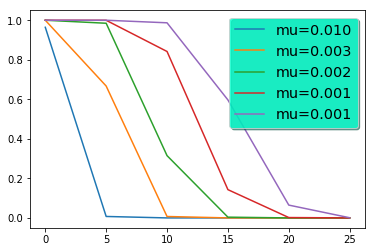

In [13]:
mus =[ 1.0/(x*100) for x in range(1,10, 2)]
experimentKanon(mus, 'mu',1)

#### Impact of $\lambda$ on $k$-anonimity

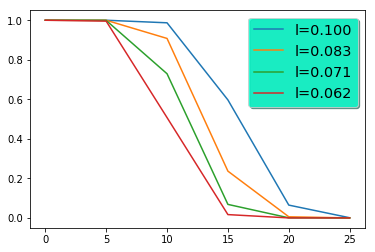

In [14]:
ls =  [1.0/(x) for x in range(10,17, 2) ]
experimentKanon(ls, 'l',2)

#### Impact of $\alpha$ on $k$-anonimity

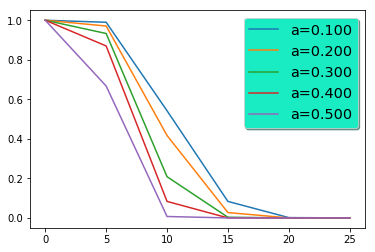

In [15]:
alphas =  [x/10.0 for x in range(1,6)]
experimentKanon(alphas, 'a',3)

### The probability that a node never joins the shuffle
Given :
 - $x$ the time a node will stay in the AP zone follows an exponential distribution
    - $P(x) = \mu\exp(-\mu\times x)$
 - $t_{inv}$:  the shuffle interval time, during the life time of node, the node will encounter $\frac{x}{t_{inv}}$ number of shuffles invitations
 - The probability of a node to not join in any shuffle in its life time is:
      
      $P_{no} = \alpha^{\frac{x}{t_{inv}}}$
      
 - The probability that a node never join an shuffle during its stay in the AP is:
 
      $P_{noap} = P(x)\times P_{no}$
 


In [16]:
from scipy.stats import expon
def exp(time, mu):
    return expon.cdf(mu,0, time)


def noshuffle(alpha, time, interval):
    return pow(alpha, time/interval)


def noshuffleinap(time, interval, alpha, mu):
    return exp(time, mu) * noshuffle(alpha, time, interval)

times = range(5,14,2)


def experimentShuffle(times,interval, alpha, mu): 
 
      shuffle_probas=[]
    
      for time in times: 
        shuffle_probas.append(noshuffleinap(time, interval, alpha, mu))
  
      return shuffle_probas


def plot (ax, times, interval, alpha,mu, msg, k): 
    shuffle_probas = experimentShuffle(times, interval, alpha, mu)
    ax.plot(times, shuffle_probas, label=msg+'='+"{:.3f}".format(k))

    legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')
    

#### Impact of $\mu$ on $P_{no}$

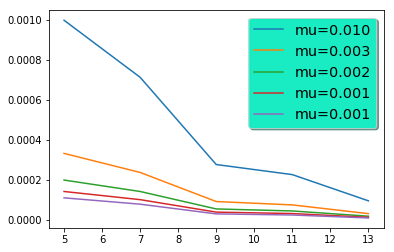

In [17]:
#mus = [1./10, 1./30, 1./50]
fig, ax = plt.subplots(1, 1)
for mu in mus:
    plot(ax, times,4, 0.5, mu, 'mu',mu)

plt.show()
#print(kp)

#### Impact of $t_{inv}$ on $P_{no}$

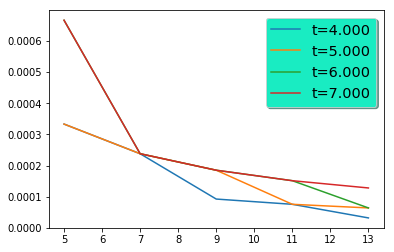

In [18]:
intervals = range(4,8)
fig, ax = plt.subplots(1, 1)
for interval in intervals:
    plot(ax, times,interval, 0.5, 1./300, 't',interval)
   
plt.show()

#### Impact of $\alpha$ on $P_{no}$

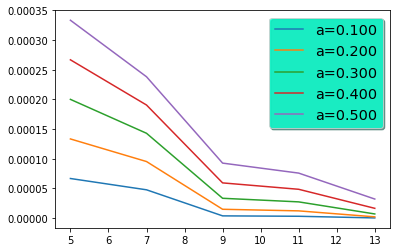

In [19]:
fig, ax = plt.subplots(1, 1)
for alpha in alphas:
    plot(ax, times,4, alpha, 1./300, 'a',alpha)
  

plt.show()

In [21]:
"""
This example shows how to work with authentication.
"""
from mininet.net import Mininet
from mininet.node import  Controller, OVSKernelAP
from mininet.cli import CLI
from mininet.log import setLogLevel
from mininet.link import TCLink

def mac_server():
    pass

def  create_network():
    net = Mininet( controller=Controller, link=TCLink, accessPoint=OVSKernelAP )
    return net 


def create_nodes(network, stations):
    nodes = []
    for i in range(0, stations):
        node = network.addStation( 'sta1', passwd='123456789a', encrypt='wpa2' ) #encrypt=(wpa,wpa2,wep) 
        nodes.append(node)
        
    return nodes


def create_access_points(networks, aps):
    accesspoints = []
    for i in range(0, aps):
        ap = net.addAccessPoint( 'ap1', ssid="simplewifi", mode="g", channel="1", passwd='123456789a', encrypt='wpa2' ) #encrypt=(wpa,wpa2,wep)
        accesspoints.append(ap)
        
    return accesspoints

def topology():
    "Create a network."
    net = Mininet( controller=Controller, link=TCLink, accessPoint=OVSKernelAP )

    print "*** Creating nodes"
    sta1 = net.addStation( 'sta1', passwd='123456789a', encrypt='wpa2' ) #encrypt=(wpa,wpa2,wep)
    sta2 = net.addStation( 'sta2', passwd='123456789a', encrypt='wpa2' ) #encrypt=(wpa,wpa2,wep)
    ap1 = net.addAccessPoint( 'ap1', ssid="simplewifi", mode="g", channel="1", passwd='123456789a', encrypt='wpa2' ) #encrypt=(wpa,wpa2,wep)
    c0 = net.addController('c0', controller=Controller, ip='127.0.0.1', port=6633 )

    print "*** Configuring wifi nodes"
    net.configureWifiNodes()

    print "*** Associating Stations"
    net.addLink(sta1, ap1)
    net.addLink(sta2, ap1)

    print "*** Starting network"
    net.build()
    c0.start()
    ap1.start( [c0] )

    print "*** Running CLI"
    CLI( net )

    print "*** Stopping network"
    net.stop()

topology()

*** Mininet must run as root.


NameError: global name 'exit' is not defined

## Related work

- [Mix zones ](http://localhost:8888/notebooks/Location%20Privacy%20in%20Pervasive%20Computing.ipynb#)

- [Disposable interface identifiers](http://localhost:8888/notebooks/Enhancing%20Location%20Privacy%20in%20Wireless%20LAN%20Through%20Disposable%20Interface%20Identifiers%20A%20Quantitative%20Analysis.ipynb)

- [Silent period](http://localhost:8888/notebooks/Enhancing%20Wireless%20Location%20Privacy%20Using%20Silent%20Period.ipynb)

## Reader's remarks

### Pros
- However some good points 
- attemps to formalise the MAC address change strategies with probabilities


### Cons
- The definition of k-anonymity does not correspond to the one given by 


In [1]:
### Prints the definifion:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from IPython.core.display import display, HTML

website = 'https://en.wiktionary.org/w/index.php?title={}&printable=yes'
larousse = 'http://www.larousse.fr/dictionnaires/anglais-francais/{}'

    

def request(url, word):
    html = urlopen(Request(url.format(word),headers={'User-Agent': 'Mozilla'})).read().decode('UTF-8')
    soup = BeautifulSoup(html,"lxml")
    
    articles = [item for item in soup.find_all('article', attrs={'role' : True})]
   
    [display(HTML(str(article))) for article in articles]
    
words = ['overheard']

[request(larousse, x) for x in words]

[None]